In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from pycocotools import mask as maskUtils
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import os
from skimage import io
from matplotlib import pyplot as plt

# 读取所有的实验结果

In [ ]:
# projects = ['consep', 'pannuke', 'monusac', 'patched_consep','patched_monusac','finetune_consep_with_pn']
projects = ['consep', 'pannuke', 'monusac']
models = ['unet', 'hover', 'maskrcnn', 'yolov8']

datas = []
for project in projects:
    for model in models:
        eval_path = f"/root/autodl-tmp/pannuke_app/projects/{project}/{model}/evaluation/{model}.csv"
        data = pd.read_csv(eval_path)
        data.columns = ['name', 'dice', 'aji', 'map', 'map50', 'average_dice', 'average_aji',
           'average_map', 'average_map50']
        data['model'] = model
        data['project'] = project
        datas.append(data)

res = np.array(datas)

## 对实验结果进行分析和总结

In [ ]:
对比不同数据集上的评估效果。
得出的结论大概会是？

不同算法在 PanNuke 上都能达到还不错的效果
PanNuke 在yolov8 上能达到比较好的效果
PanNuke 迁移学习能力ok

In [63]:
L = [1,2]

In [67]:
map(lambda x: x**2, L)

In [66]:
map(L, lambda x:x**2)

TypeError: 'function' object is not iterable

In [2]:
yolo = pd.read_csv("/root/autodl-tmp/pannuke_app/projects/pannuke/yolov8/evaluation/yolov8.csv")

In [4]:
yolo

,Unnamed: 0,dice,aji,0,1,average_dice,average_aji,average_map,average_map50
0,test_0.png,0.829935,0.663008,0.620132,0.917079,0.772229,0.635965,0.314756,0.538069
1,test_1.png,0.844758,0.497655,0.658705,0.886139,0.772229,0.635965,0.314756,0.538069
2,test_10.png,0.903665,0.716352,0.320627,0.396040,0.772229,0.635965,0.314756,0.538069
3,test_100.png,0.661418,0.628880,0.362167,0.574378,0.772229,0.635965,0.314756,0.538069
4,test_1000.png,0.736799,0.643497,0.421912,0.776049,0.772229,0.635965,0.314756,0.538069
...,...,...,...,...,...,...,...,...,...
2410,test_995.png,0.870866,0.625075,0.478168,0.801980,0.772229,0.635965,0.314756,0.538069
2411,test_996.png,0.839442,0.761125,0.548907,0.831683,0.772229,0.635965,0.314756,0.538069
2412,test_997.png,0.885066,0.794605,0.591450,0.880198,0.772229,0.635965,0.314756,0.538069
2413,test_998.png,0.842172,0.790765,0.675425,0.905941,0.772229,0.635965,0.314756,0.538069


In [5]:
yolo.columns

Index(['Unnamed: 0', 'dice', 'aji', '0', '1', 'average_dice', 'average_aji',
       'average_map', 'average_map50'],
      dtype='object')

In [6]:
yolo.columns=['name', 'dice', 'aji', 'map', 'map50', 'average_dice', 'average_aji',
       'average_map', 'average_map50']

In [60]:
yolo['model'] = 'yolo'

In [61]:
yolo

,name,dice,aji,map,map50,average_dice,average_aji,average_map,average_map50,model
0,test_0.png,0.829935,0.663008,0.620132,0.917079,0.772229,0.635965,0.314756,0.538069,yolo
1,test_1.png,0.844758,0.497655,0.658705,0.886139,0.772229,0.635965,0.314756,0.538069,yolo
2,test_10.png,0.903665,0.716352,0.320627,0.396040,0.772229,0.635965,0.314756,0.538069,yolo
3,test_100.png,0.661418,0.628880,0.362167,0.574378,0.772229,0.635965,0.314756,0.538069,yolo
4,test_1000.png,0.736799,0.643497,0.421912,0.776049,0.772229,0.635965,0.314756,0.538069,yolo
...,...,...,...,...,...,...,...,...,...,...
2410,test_995.png,0.870866,0.625075,0.478168,0.801980,0.772229,0.635965,0.314756,0.538069,yolo
2411,test_996.png,0.839442,0.761125,0.548907,0.831683,0.772229,0.635965,0.314756,0.538069,yolo
2412,test_997.png,0.885066,0.794605,0.591450,0.880198,0.772229,0.635965,0.314756,0.538069,yolo
2413,test_998.png,0.842172,0.790765,0.675425,0.905941,0.772229,0.635965,0.314756,0.538069,yolo


In [ ]:
sns.catplot(data=yolo, x="age", y="class")

In [10]:
sns.boxplot(data=yolo, y=[['dice', 'aji', 'map', 'map50']])

TypeError: Vertical orientation requires numeric `y` variable.

<AxesSubplot:xlabel='dice'>

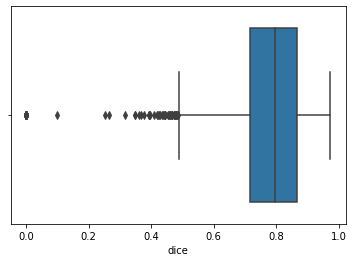

In [17]:
sns.boxplot(data=yolo, x=yolo['dice'])

In [29]:
# maskrcnn

In [44]:
res = np.load("/root/autodl-tmp/pannuke_app/src/evaluation/res.npy", allow_pickle=True).tolist()

In [45]:
ann_file = "/root/autodl-tmp/pannuke_app/datasets/processed/PanNuke/test/test_annotations.json" 
coco_api = COCO(ann_file)

loading annotations into memory...
Done (t=0.82s)
creating index...
index created!


In [46]:
coco = coco_api.loadRes(res)

Loading and preparing results...
DONE (t=0.16s)
creating index...
index created!


In [47]:
img_dir = "/root/autodl-tmp/pannuke_app/datasets/processed/PanNuke/test/imgs"

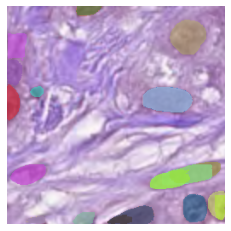

In [48]:
imgIds = coco.getImgIds(imgIds=[1])  # 给定参数img_id和cat_id，返回list of对应的所有img_id和包含了指定cat_id的所有img_id
img = coco.loadImgs(imgIds)[0] # l
annIds = coco.getAnnIds(imgIds=img['id'])
anns = coco.loadAnns(annIds)
img_path = os.path.join(img_dir, img["file_name"])
I = io.imread(img_path)
# I = io.imread(img["coco_url"])
plt.axis('off');
plt.imshow(I);
coco.showAnns(anns)

In [49]:
for ann in anns:
    print(ann['category_id'])

1
1
1
3
1
3
1
3
3
3
1
3
3
1
3
1
1
3
1
1
1
3
3
1
3
1


In [34]:
img

{'id': 1,
 'file_name': 'test_0.png',
 'width': 256,
 'height': 256,
 'date_captured': '2023-11-12 18:06:52.669956',
 'license': 1,
 'coco_url': '',
 'flickr_url': ''}

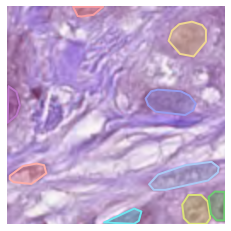

In [50]:
imgIds = coco_api.getImgIds(imgIds=[1])  # 给定参数img_id和cat_id，返回list of对应的所有img_id和包含了指定cat_id的所有img_id
img = coco_api.loadImgs(imgIds)[0] # l
annIds = coco_api.getAnnIds(imgIds=img['id'])
anns = coco_api.loadAnns(annIds)
img_path = os.path.join(img_dir, img["file_name"])
I = io.imread(img_path)
# I = io.imread(img["coco_url"])
plt.axis('off');
plt.imshow(I);
coco.showAnns(anns)

In [51]:
for ann in anns:
    print(ann['category_id'])

3
1
1
1
3
1
3
1
1


In [58]:
coco_eval = COCOeval(coco_api, coco, iouType="segm")

In [59]:
img_id = 1
coco_eval.params.imgIds = [img_id]
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.532
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.896
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.647
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.581
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.513
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.192
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.608
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.608
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.600
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=10

In [ ]:
# 后面的代码去写一下